In [104]:
import pandas as pd

In [105]:
house_df = pd.read_csv('./data/kc_house_data.csv')

In [106]:
type(house_df)

pandas.core.frame.DataFrame

In [107]:
house_df.transpose()

0                1                2      \
id                  7129300520       6414100192       5631500400   
date           20141013T000000  20141209T000000  20150225T000000   
price                   221900           538000           180000   
bedrooms                     3                3                2   
bathrooms                    1             2.25                1   
sqft_living               1180             2570              770   
sqft_lot                  5650             7242            10000   
floors                       1                2                1   
waterfront                   0                0                0   
view                         0                0                0   
condition                    3                3                3   
grade                        7                7                6   
sqft_above                1180             2170              770   
sqft_basement                0              400                0   
yr_built                  1955             1951             1933   
yr_renovated                 0             1991                0   
zipcode                  98178            98125            98028   
lat                    47.5112           47.721          47.7379   
long                  -122.257         -122.319         -122.233   
sqft_living15             1340             1690             2720   
sqft_lot15                5650             7639             8062   

                         3                4                5      \
id                  2487200875       1954400510       7237550310   
date           20141209T000000  20150218T000000  20140512T000000   
price                   604000           510000        1.225e+06   
bedrooms                     4                3                4   
bathrooms                    3                2              4.5   
sqft_living               1960             1680             5420   
sqft_lot                  5000             8080           101930   
floors                       1                1                1   
waterfront                   0                0                0   
view                         0                0                0   
condition                    5                3                3   
grade                        7                8               11   
sqft_above                1050             1680             3890   
sqft_basement              910                0             1530   
yr_built                  1965             1987             2001   
yr_renovated                 0                0                0   
zipcode                  98136            98074            98053   
lat                    47.5208          47.6168          47.6561   
long                  -122.393         -122.045         -122.005   
sqft_living15             1360             1800             4760   
sqft_lot15                5000             7503           101930   

                         6                7                8      \
id                  1321400060       2008000270       2414600126   
date           20140627T000000  20150115T000000  20150415T000000   
price                   257500           291850           229500   
bedrooms                     3                3                3   
bathrooms                 2.25              1.5                1   
sqft_living               1715             1060             1780   
sqft_lot                  6819             9711             7470   
floors                       2                1                1   
waterfront                   0                0                0   
view                         0                0                0   
condition                    3                3                3   
grade                        7                7                7   
sqft_above                1715             1060             1050   
sqft_basement                0                0              730   
yr_built   

In [108]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

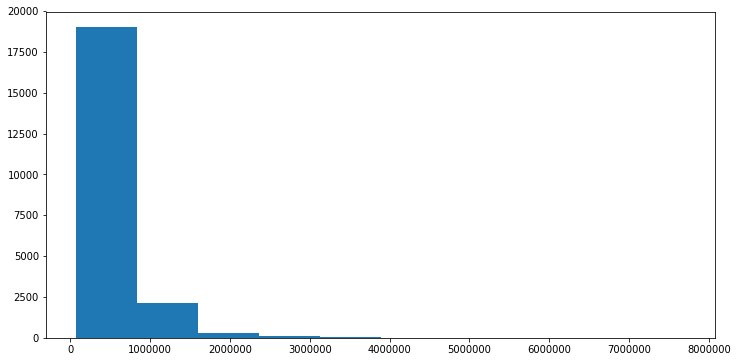

In [111]:
plt.figure(figsize=(12,6))
plt.hist(house_df.price);

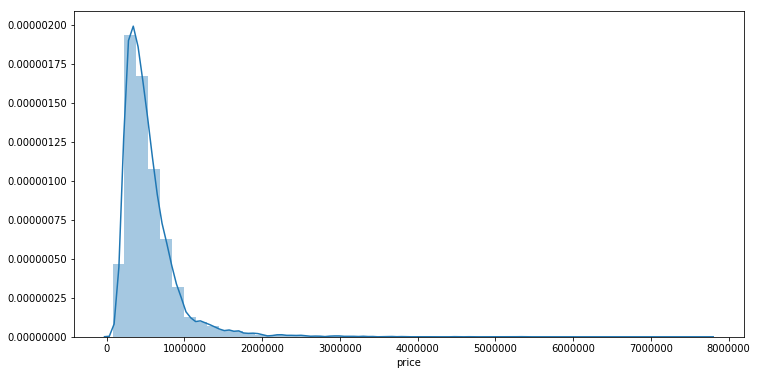

In [112]:
plt.figure(figsize=(12,6))
sn.distplot(house_df.price)

In [113]:
import numpy as np

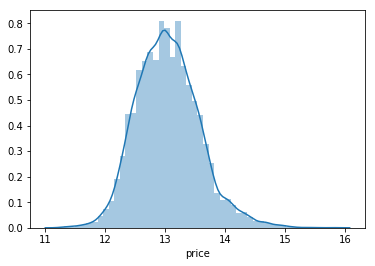

In [114]:
sn.distplot(np.log(house_df.price))

In [115]:
house_df['log_price'] = np.log(house_df.price)

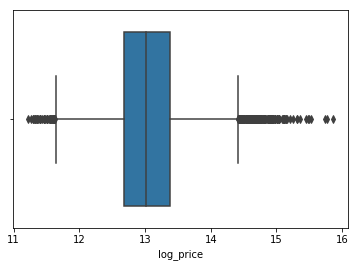

In [116]:
sn.boxplot(house_df['log_price'])

### Is price influenced by sqft living

In [117]:
plt.scatter(house_df.sqft_living, house_df.price)

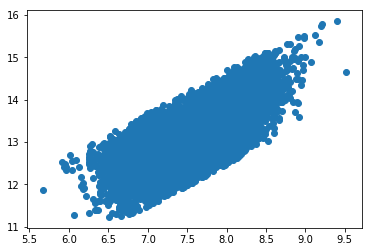

In [118]:
plt.scatter(np.log(house_df.sqft_living), 
            house_df.log_price)

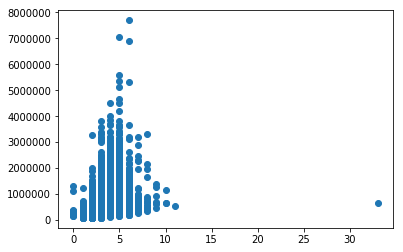

In [119]:
plt.scatter(house_df.bedrooms, 
            house_df.price)

In [120]:
house_df.waterfront.unique()

array([0, 1])

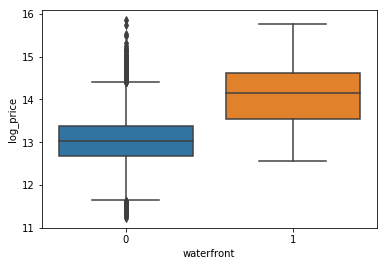

In [121]:
sn.boxplot(x = 'waterfront',
           y = 'log_price',
           data = house_df);

In [122]:
list(house_df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'log_price']

In [123]:
num_x_features = ['bedrooms',
                  'bathrooms',
                  'sqft_living',
                  'sqft_lot',
                  'floors',
                  'sqft_above',
                  'sqft_basement',
                  'sqft_living15',
                  'sqft_lot15']

In [124]:
plt.figure(figsize=(8,8))
sn.heatmap(house_df[num_x_features + ['log_price']].corr(),
           annot = True,
           cmap = sn.diverging_palette(240, 10, n = 9))

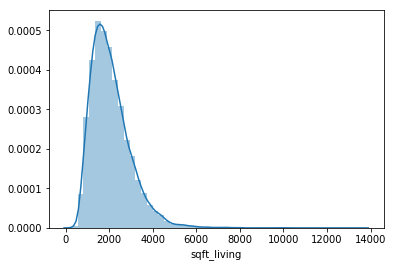

In [125]:
sn.distplot(house_df.sqft_living)

In [126]:
house_df = house_df[house_df.bedrooms < 30]

In [127]:
from scipy import stats

In [128]:
skew_df = house_df[num_x_features].skew().reset_index()

In [129]:
skew_df.columns = ['feature', 'skewness']
skew_df

feature   skewness
0       bedrooms   0.518469
1      bathrooms   0.511043
2    sqft_living   1.471483
3       sqft_lot  13.059731
4         floors   0.616107
5     sqft_above   1.446622
6  sqft_basement   1.578053
7  sqft_living15   1.108134
8     sqft_lot15   9.506541

### Data Transformations

1. Log transformation of skewed features
2. Remove outliers (bedroom)
3. Remove sqft_above (highly correlated with soft_living) (0.88)
5. Log transformation of outcome variable

In [130]:
num_x_features.remove('sqft_above')

In [131]:
skew_features = skew_df[skew_df.skewness > 0.75]['feature']

In [132]:
skew_features = list(skew_features)

In [133]:
skew_features

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [134]:
house_df[skew_features] = (house_df[skew_features]
                           .apply(lambda x: np.log1p(x)))

In [135]:
house_df[skew_features]

sqft_living   sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0         7.074117   8.639588    7.074117       0.000000       7.201171   
1         7.852050   8.887791    7.682943       5.993961       7.433075   
2         6.647688   9.210440    6.647688       0.000000       7.908755   
3         7.581210   8.517393    6.957497       6.814543       7.215975   
4         7.427144   8.997271    7.427144       0.000000       7.496097   
5         8.598036  11.532051    8.266421       7.333676       8.468213   
6         7.447751   8.827615    7.447751       0.000000       7.713785   
7         6.966967   9.181118    6.966967       0.000000       7.409136   
8         7.484930   8.918784    6.957497       6.594413       7.484930   
9         7.544861   8.788898    7.544861       0.000000       7.779467   
10        8.177797   9.189831    7.528869       7.438972       7.701200   
11        7.057037   8.699681    6.758095       5.707110       7.193686   
12        7.266129   9.898576    7.266129       0.000000       7.484930   
13        7.223296   9.177920    7.223296       0.000000       7.223296   
14        7.501634   8.486940    7.501634       0.000000       7.215975   
15        7.989899   8.517393    7.591357       6.878326       7.669028   
16        7.544861   9.549737    7.544861       0.000000       7.544861   
17        7.378384   8.366603    7.378384       0.000000       7.384610   
18        7.090910   9.195328    7.090910       0.000000       6.966967   
19        7.131699   9.187583    7.131699       0.000000       7.155396   
20        7.390799   8.513386    6.758095       6.634633       7.244942   
21        8.023225  10.711480    7.754053       6.580639       8.321422   
22        7.727976   8.748464    7.727976       0.000000       7.714677   
23        6.976348   9.174091    6.976348       0.000000       7.107425   
24        7.804251   8.779711    7.804251       0.000000       7.696667   
25        7.444833   8.454892    7.444833       0.000000       6.938284   
26        7.804251   7.898040    7.467942       6.552508       7.473637   
27        7.244942   7.366445    7.244942       0.000000       7.528869   
28        7.327123   8.761080    6.673298       6.594413       7.327123   
29        7.852050   8.878219    7.852050       0.000000       7.875119   
...            ...        ...         ...            ...            ...   
21583     6.566672   7.054450    6.566672       0.000000       7.223296   
21584     7.139660   6.803505    6.846943       5.771441       7.178545   
21585     7.534228   8.517393    7.534228       0.000000       7.682943   
21586     7.266129   7.091742    7.266129       0.000000       7.266129   
21587     7.327123   7.305860    7.327123       0.000000       7.327123   
21588     7.099202   7.153834    6.928538       5.252273       7.099202   
21589     7.840313   8.468213    7.840313       0.000000       7.840313   
21590     8.499233   9.153241    8.042699       7.496097       8.425297   
21591     7.926964   8.256607    7.926964       0.000000       7.501634   
21592     7.082549   7.090910    7.082549       0.000000       7.074117   
21593     8.335911   9.004914    8.335911       0.000000       8.016648   
21594     7.824446   8.698848    7.824446       0.000000       7.836370   
21595     7.333676   6.889591    7.300473       3.931826       7.333676   
21596     8.188967   9.152499    8.188967       0.000000       8.174985   
21597     8.134761   9.222862    8.134761       0.000000       7.736744   
21598     8.045268   8.970432    8.045268       0.000000       7.891331   
21599     8.291797   8.966867    8.291797       0.000000       8.122965   
21600     8.405367   8.998260    8.405367       0.000000       7.930566   
21601     7.262629   7.073270    7.262629       0.000000       7.159292   
21602     7.313887   9.390075    7.313887       0.000000       7.186144   
21603     7.727976   8.619208    7.727976       0.000000       7.727976   
21604     7.307202   7.027315   

### Effect on Price

- Grade
- Condition
- View

In [136]:
sn.boxplot(x = 'grade',
           y = 'log_price',
           data = house_df);

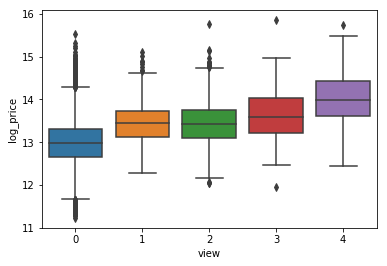

In [137]:
sn.boxplot(x = 'view',
           y = 'log_price',
           data = house_df);

### Converting Date to Age

In [138]:
house_df['yr_sold'] = house_df.date.map(lambda x: str(x)[0:4]) 

In [139]:
house_df['yr_sold'] = pd.to_numeric(house_df['yr_sold'])

In [140]:
house_df['age'] = house_df.yr_sold - house_df.yr_built

In [141]:
#plt.scatter( house_df.age, house_df.log_price)

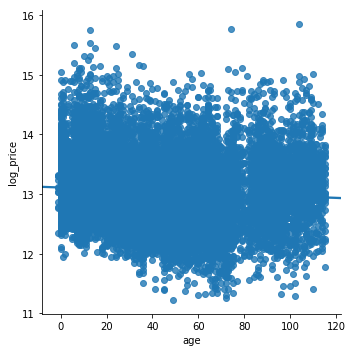

In [142]:
sn.lmplot(x = 'age',
          y = 'log_price',
          data = house_df)

### Is the house Renovated

In [143]:
house_df['is_renovated'] = (house_df
                            .yr_renovated
                            .map(lambda x: int(x!=0)))

In [144]:
num_x_features = num_x_features + ['age']

In [145]:
num_x_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'age']

In [146]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price', 'yr_sold',
       'age', 'is_renovated'],
      dtype='object')

In [147]:
cat_x_features = ['waterfront',
                  'view',
                  'is_renovated',
                  'condition',
                  'grade',
                  'zipcode']

### Encoding Categorical Features

In [148]:
house_clean_df = house_df[num_x_features + cat_x_features]

In [149]:
encoded_house_df = pd.get_dummies(house_clean_df,
                                  columns = cat_x_features,
                                  drop_first = True)

In [150]:
list(encoded_house_df.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'age',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'is_renovated_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',


### Split the dataset into train and test

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, \
y_train, y_test = train_test_split(encoded_house_df,
                                   house_df.log_price,
                                   train_size = 0.8,
                                   random_state = 42)

### Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lreg_v1 = LinearRegression()

In [155]:
lreg_v1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
lreg_v1.intercept_

7.457380014989299

### Measure Accuracy

In [157]:
y_pred = lreg_v1.predict(X_test)

In [158]:
from sklearn import metrics

In [159]:
metrics.r2_score(y_test, y_pred)

0.8854612699605435